In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/La2O3junio3.csv',names=['2Theta','I'])
bg = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/background.csv',names=['2Theta','I'])
db = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/AMS_La2O3.csv')

In [3]:
func = lambda x,a,b,c: a*np.exp(-b*x)+c

pars,_ = curve_fit(func,bg['2Theta'],bg['I'])

noise = lambda x: func(x,*pars)

bg_fit = pd.DataFrame()
bg_fit['2Theta'] = raw_data['2Theta']
bg_fit['I'] = noise(bg_fit['2Theta'])


/home/santiago/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


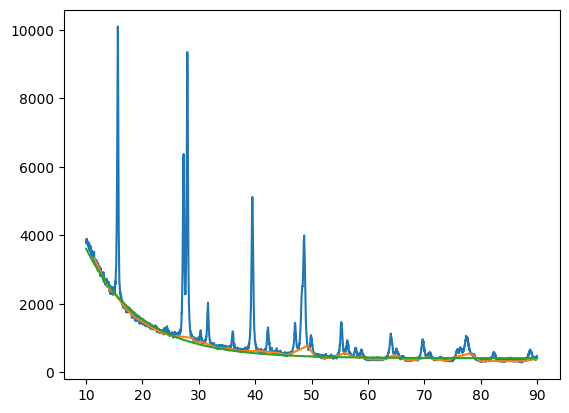

In [4]:
plt.plot(raw_data['2Theta'],raw_data['I'])
plt.plot(bg['2Theta'],bg['I'])
plt.plot(bg_fit['2Theta'],bg_fit['I'])

In [5]:
filtered_data = pd.DataFrame()
filtered_data['2Theta'] = raw_data['2Theta']
filtered_data['I'] = raw_data['I']-bg_fit['I']
filtered_data['I'] = filtered_data['I']/np.max(filtered_data['I'])

In [6]:
db['Norm_Intensity'] = db['INTENSITY']/np.max(db['INTENSITY'])
db

,2-THETA,INTENSITY,D-SPACING,H,K,L,Multiplicity,Norm_Intensity
0,14.47,6.09,6.1200,0,0,1,2,0.105748
1,26.18,17.96,3.4035,1,0,0,6,0.311860
2,29.18,15.34,3.0600,0,0,2,2,0.266366
3,30.04,57.59,2.9745,0,1,1,6,1.000000
4,30.04,42.41,2.9745,1,0,1,6,0.736413
5,39.61,9.30,2.2755,0,1,2,6,0.161486
6,39.61,9.30,2.2755,1,0,2,6,0.161486
7,46.20,16.18,1.9650,1,1,0,3,0.280952
8,52.28,7.75,1.7498,0,1,3,6,0.134572
9,52.28,10.03,1.7498,1,0,3,6,0.174162


(0.0, 1.0)

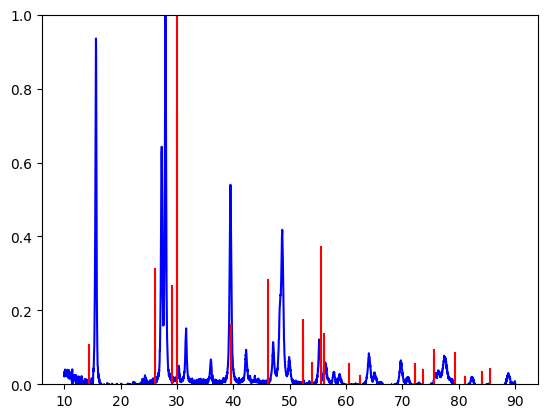

In [7]:
plt.plot(filtered_data['2Theta'],filtered_data['I'],color='b')
for i in range(len(db['2-THETA'].values)):
    plt.axvline(db.iloc[i]['2-THETA'],0,db.iloc[i]['Norm_Intensity'],color='r')

plt.ylim(0,1)